In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering
from hdbscan import HDBSCAN 
from sklearn.manifold import MDS, TSNE
from glob import glob
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, DBSCAN, KMeans, MeanShift, SpectralClustering
import time
from collections import Counter, defaultdict
import seaborn as sns

from tqdm import tqdm
from joblib import Parallel, delayed
import os
import pandas as pd

from scipy.stats import rv_discrete

import pickle

from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LinearRegression

In [5]:
sns.set_style("whitegrid") # important
sns.set_palette(sns.color_palette("hls"))

In [6]:
# def mean_metrics(true_labels, labels, sample_size=10, iterations=200):
#     iterations = iterations
#     all_metrics = np.zeros((iterations, 4))
#     for i in range(iterations):
#         all_metrics[i] = metrics(true_labels, labels, sample_size=sample_size)
        
# #     print(all_metrics)
#     return np.nanmean(all_metrics, axis=0)

def mean_metrics(true_labels, labels, sample_size=10, iterations=200):
    return np.nanmean(metrics_sample(true_labels, labels, sample_size, iterations), axis=0)
        
def metrics_sample(true_labels, labels, sample_size=10, iterations=200):
    all_metrics = np.zeros((iterations, 4))
    for i in range(iterations):
        all_metrics[i] = metrics(true_labels, labels, sample_size=sample_size)
    return all_metrics


def get_true_labels(labels):
    true_labels = np.zeros(labels.shape)
    true_labels[int(labels.shape[0]/2):] = 1
    return true_labels

In [7]:
# label_true = 0
# label_false = 1 # vb need vastupidi


def metrics(labels_true, labels_pred, sample_size=10, label_true=0, label_false=1):
    conf_matrix = {'true':{'true':0, 'na':0, 'false':0}, 'false':{'true':0, 'na':0, 'false':0}}

    for cluster_index in np.unique(labels_pred):
        cluster_element_indexes = np.where(labels_pred == cluster_index)[0]
        cluster_elements = labels_true[cluster_element_indexes]
        cluster_sample = np.random.choice(cluster_elements, size=min(sample_size, len(cluster_elements)))

        counter = Counter(cluster_sample)
        count_true_in_sample = counter[label_true]/sample_size
        count_false_in_sample = counter[label_false]/sample_size
        
        if count_true_in_sample >= 0.7:
            predicted_label = 'true'
        elif 0.3 < count_true_in_sample < 0.7:
            predicted_label = 'na'
        else:
            predicted_label = 'false'
        true_counter = Counter(cluster_elements)
        conf_matrix['true'][predicted_label] += true_counter[label_true]
        conf_matrix['false'][predicted_label] += true_counter[label_false]


    sum_all = sum(conf_matrix['true'].values()) + sum(conf_matrix['false'].values())

    accuracy = (conf_matrix['true']['true'] + conf_matrix['false']['false']) / sum_all
    recall = conf_matrix['true']['true'] / sum(conf_matrix['true'].values())
    try:
        precision = conf_matrix['true']['true'] / (conf_matrix['true']['true'] + conf_matrix['false']['true'])
    except ZeroDivisionError:
        precision = np.nan
    na_fraction = (conf_matrix['true']['na'] + conf_matrix['false']['na']) / sum_all

    return accuracy, recall, precision, na_fraction
    

# metrics(labels, labels_pred)

In [82]:
cluster_sizes = [2,5,10,20,30, 40, 50]

algorithm_samples = 1000
n_sizes = len(cluster_sizes)

acc = np.zeros((algorithm_samples, n_sizes))
recall = np.zeros((algorithm_samples, n_sizes))
precision = np.zeros((algorithm_samples, n_sizes))
na_frac = np.zeros((algorithm_samples, n_sizes))


for size_index, n_clusters in enumerate(cluster_sizes):
    print(n_clusters)
    model = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=n_clusters)
    model.fit(X)
    labels_pred = np.array(model.labels_)
    for i in range(algorithm_samples):
        results = metrics(labels, labels_pred, sample_size=5)
        acc[i,size_index] = results[0]
        recall[i,size_index] = results[1]
        precision[i,size_index] = results[2]
        na_frac[i,size_index] = results[3]

2


NameError: name 'X' is not defined

In [298]:
np.percentile(np.arange(10), [10, 50, 90])

array([ 0.9,  4.5,  8.1])

ValueError: x and y must have same first dimension

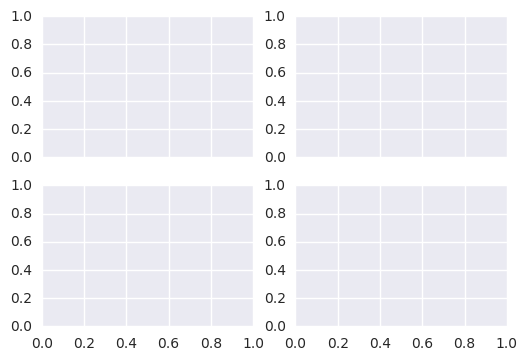

In [486]:
# f, (ax1, ax2, ax3, ax4) = plt.subplots(2,2)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey=False, sharex=True)

# sns.regplot(x, y, ax=ax1)
# sns.kdeplot(x, ax=ax2)
ax1.plot(cluster_sizes, np.median(acc, axis=0))
ax1.set_title('accuracy')
# ax1.errorbar(df.index, mean, yerr=std, fmt='-o')

ax2.plot(cluster_sizes, np.median(recall, axis=0))
ax2.set_title('recall')

ax3.plot(cluster_sizes, np.median(precision, axis=0))
ax3.set_title('precision')

ax4.plot(cluster_sizes, np.median(na_frac, axis=0))
ax4.set_title('na_frac')



In [35]:
x = []
y = []
for k, v in counter.items():
    x.append(k)
    y.append(v)

In [201]:

labels = np.load(glob('datasets/labels/spectral/*')[0])
true_labels = np.zeros(labels.shape)
true_labels[int(labels.shape[0]/2):] = 1
labels, true_labels

(array([4, 5, 9, ..., 0, 8, 1], dtype=int32),
 array([ 0.,  0.,  0., ...,  1.,  1.,  1.]))

In [198]:
for labels_file in glob('datasets/labels/spectral/*'):
#     print(labels_file)
    labels = np.load(labels_file)
#     print(labels)
    labels.shape
    true_labels = np.zeros(labels.shape)
    true_labels[int(labels.shape[0]/2):] = 1
#     print(Counter(labels))
    counter = Counter(labels)
    arr = np.array(list(counter.values()))
    np.sum(arr)/len(arr)
    median_of_equal_clusters = np.median(arr)/(np.sum(arr)/len(arr))
    medians_of_equal_clusters.append(median_of_equal_clusters)
#     print(len(arr))
    by_dict[len(arr)].append(median_of_equal_clusters)
    homo.append(homogeneity_score(true_labels, labels))

'datasets/labels/spectral/angular-distance_mean-vec_Eesti_TallinnTartu_w_2_s_True_n_10.npy'

In [505]:
files = glob('datasets/labels/spectral/*')
files_no_n = [filename.replace('_n_2.npy', '.npy').replace('_n_10.npy', '.npy').replace('_n_40.npy', '.npy') for filename in files]
unique_files = list(set(files_no_n))

In [1333]:
len(set(files_no_n))

1686

In [10]:
all_n = [2,10,40]

In [58]:
unique_files

['datasets/labels/hdbscan/tfidf_lsi-cos-dist_tfidf_features_joogitee_sõidutee_w_3_s_True_n_10.npy',
 'datasets/labels/hdbscan/cbow_mean-vec_angular-distance_ämber_pang_w_3_s_True.npy',
 'datasets/labels/hdbscan/sg_mean-vec_euclidean-distance_joogitee_sõidutee_w_2_s_False.npy',
 'datasets/labels/hdbscan/tfidf_mds_angular-distance_tfidf-features_Eesti_TallinnTartu_w_2_s_True_n_40.npy',
 'datasets/labels/hdbscan/cbow_pca_mean-vec_hea_halb_w_3_s_False_n_2.npy',
 'datasets/labels/hdbscan/sg_mean-vec_angular-distance_joogitee_sõidutee_w_3_s_False.npy',
 'datasets/labels/hdbscan/cbow_mds_euclidean-distance_mean-vec_countries_cities_w_3_s_True_n_40.npy',
 'datasets/labels/hdbscan/cbow_mds_euclidean-distance_mean-vec_ämber_pang_w_2_s_False_n_10.npy',
 'datasets/labels/hdbscan/cbow_mds_euclidean-distance_mean-vec_õun_kivi_w_2_s_False_n_40.npy',
 'datasets/labels/hdbscan/sg_mds_mean-vec_euclidean-distance_õun_puder_w_3_s_False_n_2.npy',
 'datasets/labels/hdbscan/tfidf_lsi_tfidf_features_hea_halb_

In [61]:
# accuracies_from_file(unique_files[4])
unique_file = unique_files[4]

In [66]:
unique_file

'datasets/labels/spectral/cbow_mds_euclidean-distance_mean-vec_joogitee_sõidutee_w_4_s_True_n_2.npy'

In [67]:
accuracies = []
for n in all_n:
    try:
        labels = np.load(unique_file.replace('.npy', '_n_{}.npy'.format(n)))
        true_labels = get_true_labels(labels)
        current_mean_metrics = metrics_sample(true_labels, labels)
        acc = current_mean_metrics[:,0]
        accuracies.append(acc)
    except Exception as e:
#             print(e)
        accuracies.append(np.nan)

In [71]:
accuracies = np.array(accuracies)

In [65]:
metrics_sample(true_labels, labels)[:,0]

array([ 0.70903955,  0.72316384,  0.73587571,  0.70903955,  0.66525424,
        0.75988701,  0.7259887 ,  0.68079096,  0.72175141,  0.66666667,
        0.70338983,  0.68361582,  0.71610169,  0.68079096,  0.75141243,
        0.75      ,  0.76129944,  0.72457627,  0.72740113,  0.71186441,
        0.74293785,  0.69067797,  0.67514124,  0.74011299,  0.72881356,
        0.64124294,  0.6920904 ,  0.69350282,  0.77542373,  0.69915254,
        0.69774011,  0.71045198,  0.63135593,  0.75141243,  0.75988701,
        0.78672316,  0.69774011,  0.68361582,  0.73022599,  0.71610169,
        0.71892655,  0.77824859,  0.70480226,  0.70903955,  0.73587571,
        0.71610169,  0.77824859,  0.66666667,  0.67937853,  0.73022599,
        0.74717514,  0.73022599,  0.75706215,  0.74152542,  0.68079096,
        0.71045198,  0.73728814,  0.71045198,  0.77542373,  0.72881356,
        0.78672316,  0.73022599,  0.81779661,  0.73587571,  0.70762712,
        0.78672316,  0.71468927,  0.74435028,  0.6920904 ,  0.70

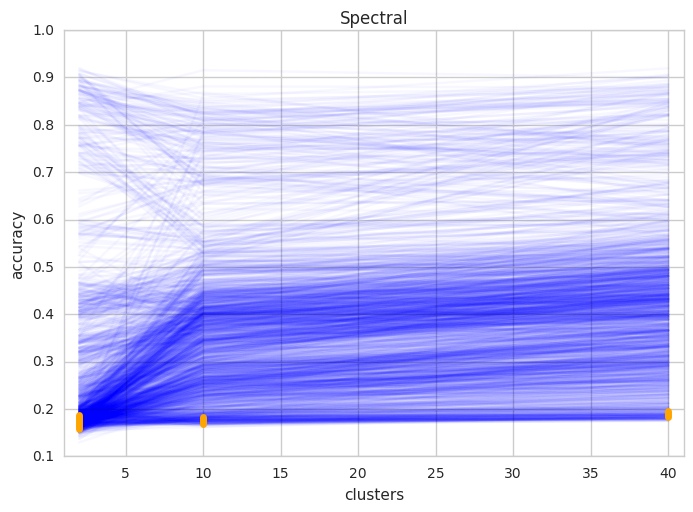

In [45]:
files = glob('datasets/labels/agglomerative/*')
files = glob('datasets/labels/spectral/*')

files_no_n = [filename[:filename.rindex('_n_')] + '.npy' for filename in files]
unique_files = list(set(files_no_n))


def accuracies_from_file(unique_file):
    accuracies = []
    for n in all_n:
        try:
            labels = np.load(unique_file.replace('.npy', '_n_{}.npy'.format(n)))
            true_labels = get_true_labels(labels)
            current_mean_metrics = mean_metrics(true_labels, labels)
            acc = current_mean_metrics[0]
            accuracies.append(acc)
        except Exception as e:
#             print(e)
            accuracies.append(np.nan)
            
    return accuracies

# all_accuracies = Parallel(n_jobs=30)(delayed(accuracies_from_file)(unique_file) for unique_file in tqdm(unique_files))


for i, acc in enumerate(all_accuracies):
    
    plt.plot(all_n, acc, alpha=0.03, color='blue')

plt.xlim([1,41])
color = 'orange'
width = 5
plt.plot([2]*2, arr_perc(spe, 2),c=color, linewidth=width)
plt.plot([10]*2, arr_perc(spe, 10),c=color, linewidth=width)
plt.plot([40]*2, arr_perc(spe, 40),c=color, linewidth=width)

plt.title('Spectral')
plt.xlabel('clusters')
plt.ylabel('accuracy')

plt.show()
# na_frac = current_mean_metrics[3]


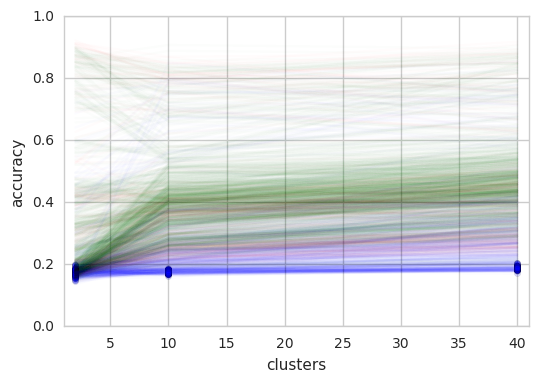

In [1265]:
# colors = {0:'blue', 1:'green', 2:'red'}

colors = ['gray']*len(unique_files)
alphas = [0]*len(unique_files)
for i, unique_file in enumerate(unique_files):
    if 'tfidf' in unique_file:
        colors[i] = 'blue'
        alphas[i] = 0.01
    if 'mean-vec' in unique_file:
        colors[i] = 'green'
        alphas[i] = 0.01
    if 'wmd' in unique_file :
        colors[i] = 'red'
        alphas[i] = 0.01
#     if 'wmd' in unique_file and 'banaan' in unique_file:
#         colors[i] = 'yellow'
#         alphas[i] = 0.15
        

for i, acc in enumerate(all_accuracies):
    
    plt.plot(all_n, acc, alpha=alphas[i], color=colors[i])

# plt.title('agglomerative clustering\nblue: tfidf, green: mean-vec, red: wmd')
# plt.title('agglomerative clustering\nblue: tfidf, green: mean-vec, red: wmd')
plt.xlabel('clusters')
plt.ylabel('accuracy')
plt.xlim([1,41])
plt.scatter([2]*100, np.array(dage_metrics[2])[:,0], alpha=0.15)
plt.scatter([10]*100, np.array(dage_metrics[10])[:,0], alpha=0.15)
plt.scatter([40]*100, np.array(dage_metrics[40])[:,0], alpha=0.15)


plt.show()
# na_frac = current_mean_metrics[3]


In [46]:
files = glob('datasets/labels/hdbscan/*')
files_no_n = [filename[:filename.rindex('_size_')] + '.npy' for filename in files]
unique_files = list(set(files_no_n))

In [47]:
len(files), len(unique_files)

(10920, 1820)

In [1380]:
line_files = glob('datasets/labels/hdbscan/{}*'.format(os.path.basename(unique_files[0]).replace('.npy', '')))

In [48]:
def hdbscan_unique_name_to_line(unique_file_name):
    line_files = glob('datasets/labels/hdbscan/{}*'.format(os.path.basename(unique_file_name).replace('.npy', '')))
    coords = {}
    for line_file in line_files:
        labels = np.load(line_file)
        true_labels = get_true_labels(labels)
        current_mean_metrics = mean_metrics(true_labels, labels, iterations=100)
        acc = current_mean_metrics[0]
        n = len(np.unique(labels))
#         print(n,acc)
        if n in coords:
            coords[n].append(acc)
        else:
            coords[n] = [acc]
    
#     print(coords)
    for n, accs in coords.items():
        if len(accs) > 1:
            coords[n] = np.mean(accs)
        else:
            coords[n] = accs[0]

    line_coords = sorted(coords.items(), key=lambda x: x[0])
    return line_coords

# hdbscan_unique_name_to_line(unique_files[0])

In [ ]:
hdbscan_results = {}
for unique_file in unique_files:
    hdbscan_results[unique_file] = hdbscan_unique_name_to_line(unique_file)

In [49]:
hdbscan_lines = Parallel(n_jobs=30)(delayed(hdbscan_unique_name_to_line)(unique_file) for unique_file in tqdm(unique_files))


100%|██████████| 1820/1820 [08:51<00:00,  3.39it/s]


In [1385]:
123

123

In [50]:
hdbscan_lines

[[(10, 0.45815624999999977),
  (23, 0.5505833333333332),
  (27, 0.61489583333333342),
  (38, 0.53419791666666649),
  (54, 0.56156249999999996),
  (80, 0.55113541666666654)],
 [(1, 0.155), (3, 0.17124255952380948), (4, 0.19781249999999995)],
 [(1, 0.19500000000000001),
  (3, 0.17931593312862504),
  (32, 0.23460081883316281),
  (102, 0.2438741044012282)],
 [(3, 0.18319789260969965),
  (7, 0.16852987875288683),
  (116, 0.16873989607390311),
  (750, 0.2771088337182448)],
 [(3, 0.13517300000000015),
  (321, 0.25435499999999989),
  (423, 0.25260999999999989),
  (551, 0.26891799999999993),
  (946, 0.30206399999999994),
  (1545, 0.35553499999999993)],
 [(3, 0.66859957401490933),
  (6, 0.59765175718849806),
  (7, 0.58390308839190541),
  (8, 0.62541001064962831),
  (17, 0.65913738019169399),
  (42, 0.63341320553780678)],
 [(3, 0.18060367892976578),
  (4, 0.16051505016722406),
  (9, 0.25210869565217398),
  (18, 0.27740635451505008)],
 [(3, 0.19711663066954649), (74, 0.27726781857451399)],
 [(3, 0

In [1750]:
h_metrics = np.load('hdbscan_random_metrics.npy').item()

In [1753]:
len(h_metrics[2])b

50

100%|██████████| 1820/1820 [00:03<00:00, 491.12it/s]


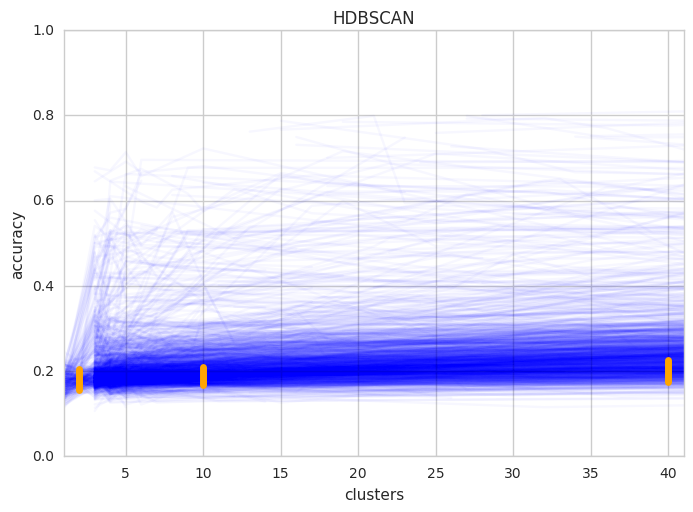

In [53]:

for line in tqdm(hdbscan_lines, miniters=200):
    plt.plot([xy[0] for xy in line], [xy[1] for xy in line], color='blue', alpha=0.03)
# plt.xlim([0,41])
plt.ylim([0,1])

# plt.scatter([2]*50, np.array(h_metrics[2])[:,0], alpha=0.15)
# plt.scatter([10]*50, np.array(h_metrics[10])[:,0], alpha=0.15)
# plt.scatter([40]*50, np.array(h_metrics[40])[:,0], alpha=0.15)
plt.xlabel('clusters')
plt.ylabel('accuracy')
plt.title('HDBSCAN')



plt.xlim([1,41])
color = 'orange'
width = 5
plt.plot([2]*2, arr_perc(hdb, 2),c=color, linewidth=width)
plt.plot([10]*2, arr_perc(hdb, 10),c=color, linewidth=width)
plt.plot([40]*2, arr_perc(hdb, 40),c=color, linewidth=width)

plt.show()


In [679]:
hdbscan_unique_files = list(unique_files)

In [1324]:
123

123

In [1307]:
# random baseline

#get distributions of agglo, hdbscan and spectral
files = glob('datasets/labels/agglomerative/*')


In [1308]:
agglo_results = {}
for file in files:
    agglo_results[file] = {'labels': np.load(file)}

In [1309]:
for fname, res in agglo_results.items():
    res['counter'] = Counter(res['labels'])

In [1310]:
for fname, res in agglo_results.items():
    res['contexts_count'] = len(res['labels'])
# agglo_results[fname]

In [1311]:
for fname, res in agglo_results.items():
    res['biggest_cluster_fraction'] = res['counter'].most_common(1)[0][1]/res['contexts_count']

In [1312]:
for fname, res in agglo_results.items():
    res['n_clusters'] = len(np.unique(res['labels']))

In [1313]:
for fname, res in agglo_results.items():
    res['cluster_fractions'] = np.array(list(agglo_results[fname]['counter'].values()))/agglo_results[fname]['contexts_count']

In [728]:
biggest_cluster_fraction = agglo_results[fname]['counter'].most_common(1)[0][1]/agglo_results[fname]['contexts_count']

In [1314]:
fractions2 = [res['biggest_cluster_fraction'] for fname, res in agglo_results.items() if res['n_clusters'] == 2]
fractions10 = [res['biggest_cluster_fraction'] for fname, res in agglo_results.items() if res['n_clusters'] == 10]
fractions40 = [res['biggest_cluster_fraction'] for fname, res in agglo_results.items() if res['n_clusters'] == 40]

In [1334]:
all_fractions2 = [res['cluster_fractions'] for fname, res in agglo_results.items() if res['n_clusters'] == 2]
all_fractions10 = [res['cluster_fractions'] for fname, res in agglo_results.items() if res['n_clusters'] == 10]
all_fractions40 = [res['cluster_fractions'] for fname, res in agglo_results.items() if res['n_clusters'] == 40]

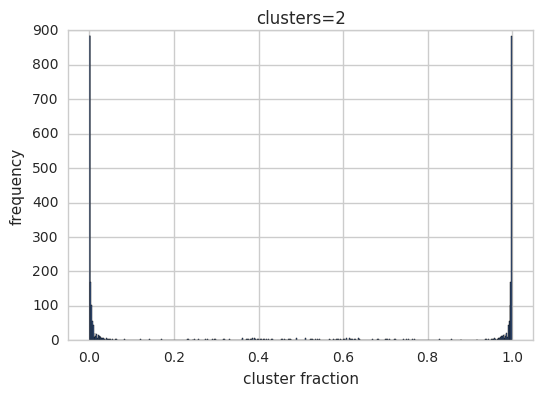

In [1337]:
fractions2_histogram_plot = plt.hist(np.array(all_fractions2).flatten(), bins=500)
plt.xlabel('cluster fraction')
plt.ylabel('frequency')
plt.title('clusters=2')
plt.xlim([-0.05, 1.05])
plt.show()

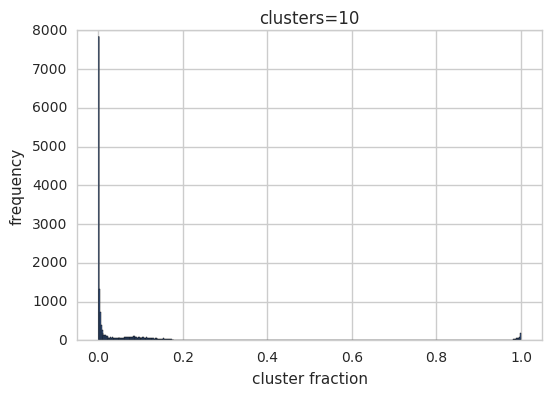

In [1341]:
fractions10_histogram_plot = plt.hist(np.array(all_fractions10).flatten(), bins=500)
plt.xlabel('cluster fraction')
plt.ylabel('frequency')
plt.title('clusters=10')
plt.xlim([-0.05, 1.05])
plt.show()

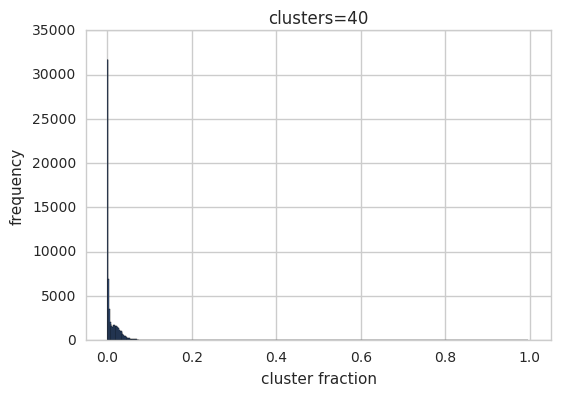

In [1340]:
fractions40_histogram_plot = plt.hist(np.array(all_fractions40).flatten(), bins=500)
plt.xlabel('cluster fraction')
plt.ylabel('frequency')
plt.title('clusters=40')
plt.xlim([-0.05, 1.05])
plt.show()

In [ ]:
dage_metrics = {}

clusters_count = 40
x = fractions40_histogram_plot[1][1:]
p_all = fractions40_histogram_plot[0]

x_index = np.arange(x.shape[0])
px = p_all/np.sum(p_all) 

dage_metrics[clusters_count] = []

for i in tqdm(range(20)):

    indexes = rv_discrete(values=(x_index,px)).rvs(size=clusters_count)
    cluster_sizes = x[indexes]
    sum(cluster_sizes), cluster_sizes

    context_count = 4000

    actual_cluster_sizes = np.array(cluster_sizes*context_count, dtype=np.int)
    actual_cluster_sizes

    randomly_assigned_labels = []
    for cluster_index in range(clusters_count):
        randomly_assigned_labels += [cluster_index]*actual_cluster_sizes[cluster_index]

    np.random.shuffle(randomly_assigned_labels)
    # Counter(randomly_assigned_labels)

    true_labels = np.zeros(len(randomly_assigned_labels))

    true_labels[int(len(true_labels)/2):] = 1

#     print(Counter(true_labels))

    random_accuracies = []
    dage_iterations = 5
    for i in range(dage_iterations):
        run_metrics = mean_metrics(true_labels, randomly_assigned_labels)
#         print('acc', run_metrics[0])
        dage_metrics[clusters_count].append(run_metrics)

#     plt.scatter(range(dage_iterations), random_accuracies)
#     plt.show()

In [1227]:
np.sort(np.array(dage_metrics[2])[:,0])[-10:]

array([ 0.25375  ,  0.2690625,  0.2696875,  0.2775   ,  0.28625  ,
        0.46125  ,  0.465    ,  0.465625 ,  0.470625 ,  0.47375  ])

In [1235]:
np.save('agglo_random_metrics.npy', dage_metrics)

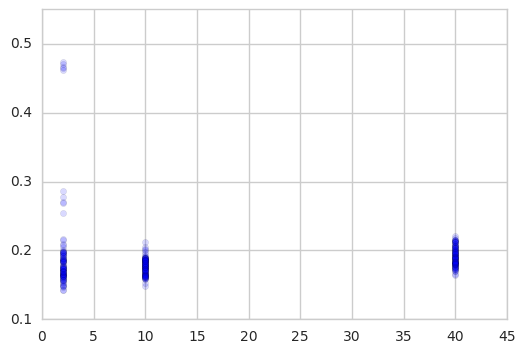

In [1232]:
plt.scatter([2]*100, np.array(dage_metrics[2])[:,0], alpha=0.15)
plt.scatter([10]*100, np.array(dage_metrics[10])[:,0], alpha=0.15)
plt.scatter([40]*100, np.array(dage_metrics[40])[:,0], alpha=0.15)

In [1343]:
spectral_files = glob('datasets/labels/spectral/*')


In [1344]:
spectral_results = {}
for file in spectral_files:
    spectral_results[file] = {'labels': np.load(file)}

In [1345]:
for fname, res in spectral_results.items():
    res['counter'] = Counter(res['labels'])

# for fname, res in agglo_results.items():
    res['contexts_count'] = len(res['labels'])
# agglo_results[fname]

# for fname, res in agglo_results.items():
    res['biggest_cluster_fraction'] = res['counter'].most_common(1)[0][1]/res['contexts_count']

# for fname, res in agglo_results.items():
    res['n_clusters'] = len(np.unique(res['labels']))

# for fname, res in agglo_results.items():
    res['cluster_fractions'] = np.array(list(res['counter'].values()))/res['contexts_count']

In [728]:
biggest_cluster_fraction = agglo_results[fname]['counter'].most_common(1)[0][1]/agglo_results[fname]['contexts_count']

In [741]:
fractions2 = [res['biggest_cluster_fraction'] for fname, res in spectral_results.items() if res['n_clusters'] == 2]
fractions10 = [res['biggest_cluster_fraction'] for fname, res in spectral_results.items() if res['n_clusters'] == 10]
fractions40 = [res['biggest_cluster_fraction'] for fname, res in spectral_results.items() if res['n_clusters'] == 40]

In [1346]:
all_fractions2 = [res['cluster_fractions'] for fname, res in spectral_results.items() if res['n_clusters'] == 2]
all_fractions10 = [res['cluster_fractions'] for fname, res in spectral_results.items() if res['n_clusters'] == 10]
all_fractions40 = [res['cluster_fractions'] for fname, res in spectral_results.items() if res['n_clusters'] == 40]

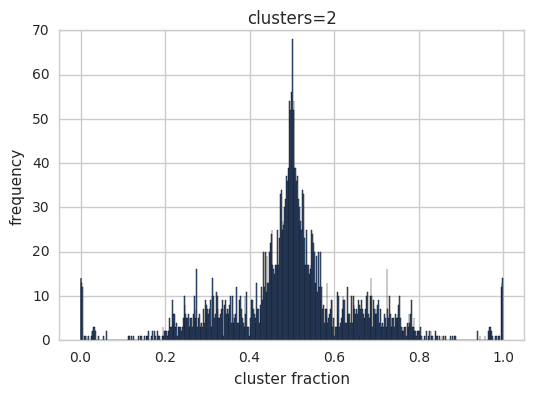

In [1347]:
# fractions2_histogram_plot = plt.hist(np.array(all_fractions2).flatten(), bins=500)
plot_cluster_fractions(all_fractions2, 2)
plt.show()

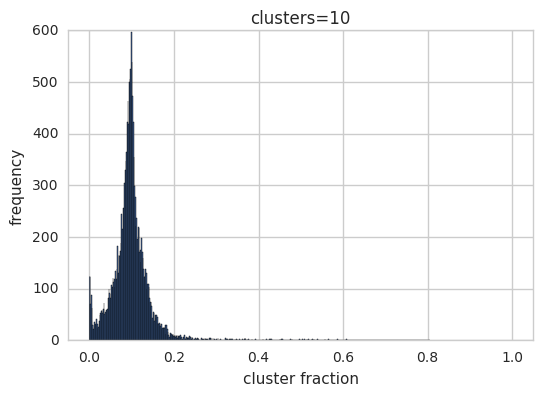

In [1351]:
# fractions10_histogram_plot = plt.hist(np.array(all_fractions10).flatten(), bins=500)
# plt.show()
_ = plot_cluster_fractions(all_fractions10, 10)

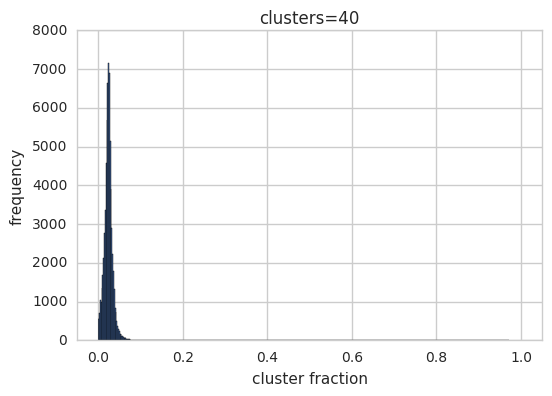

In [1350]:
# fractions40_histogram_plot = plt.hist(np.array(all_fractions40).flatten(), bins=500)
# plt.show()
_ = plot_cluster_fractions(all_fractions40, 40)


In [1248]:
dage_metrics = {}

In [1251]:
clusters_count = 2
x = fractions2_histogram_plot[1][1:]
p_all = fractions2_histogram_plot[0]

x_index = np.arange(x.shape[0])
px = p_all/np.sum(p_all) 

dage_metrics[clusters_count] = []

for i in tqdm(range(20)):

    indexes = rv_discrete(values=(x_index,px)).rvs(size=clusters_count)
    cluster_sizes = x[indexes]
    sum(cluster_sizes), cluster_sizes

    context_count = 4000

    actual_cluster_sizes = np.array(cluster_sizes*context_count, dtype=np.int)
    actual_cluster_sizes

    randomly_assigned_labels = []
    for cluster_index in range(clusters_count):
        randomly_assigned_labels += [cluster_index]*actual_cluster_sizes[cluster_index]

    np.random.shuffle(randomly_assigned_labels)
    # Counter(randomly_assigned_labels)

    true_labels = np.zeros(len(randomly_assigned_labels))

    true_labels[int(len(true_labels)/2):] = 1

#     print(Counter(true_labels))

    random_accuracies = []
    dage_iterations = 5
    for i in range(dage_iterations):
        run_metrics = mean_metrics(true_labels, randomly_assigned_labels)
#         print('acc', run_metrics[0])
        dage_metrics[clusters_count].append(run_metrics)

#     plt.scatter(range(dage_iterations), random_accuracies)
#     plt.show()

100%|██████████| 20/20 [00:54<00:00,  2.63s/it]


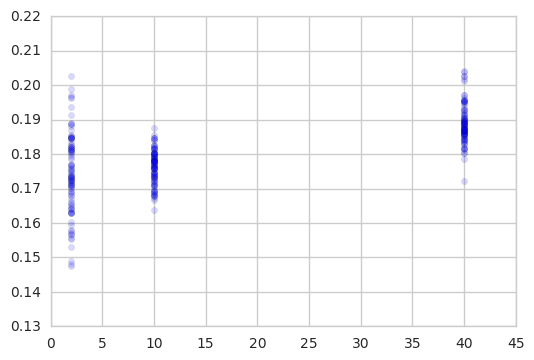

In [1252]:
plt.scatter([2]*100, np.array(dage_metrics[2])[:,0], alpha=0.15)
plt.scatter([10]*100, np.array(dage_metrics[10])[:,0], alpha=0.15)
plt.scatter([40]*100, np.array(dage_metrics[40])[:,0], alpha=0.15)

In [1266]:
np.save('spectral_random_metrics.npy', dage_metrics)

In [1268]:
hdbscan_files = glob('datasets/labels/hdbscan/*')


In [1269]:
hdbscan_results = {}
for file in hdbscan_files:
    hdbscan_results[file] = {'labels': np.load(file)}

In [1270]:
for fname, res in hdbscan_results.items():
    res['counter'] = Counter(res['labels'])

# for fname, res in agglo_results.items():
    res['contexts_count'] = len(res['labels'])
# agglo_results[fname]

# for fname, res in agglo_results.items():
    res['biggest_cluster_fraction'] = res['counter'].most_common(1)[0][1]/res['contexts_count']

# for fname, res in agglo_results.items():
    res['n_clusters'] = len(np.unique(res['labels']))

# for fname, res in agglo_results.items():
    res['cluster_fractions'] = np.array(list(res['counter'].values()))/res['contexts_count']

In [1273]:
all_fractions2 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 2]
all_fractions10 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 10]
all_fractions40 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 40]

all_fractions3 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 3]
all_fractions4 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 4]
all_fractions5 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 5]
all_fractions20 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 20]
all_fractions30 = [res['cluster_fractions'] for fname, res in hdbscan_results.items() if res['n_clusters'] == 30]

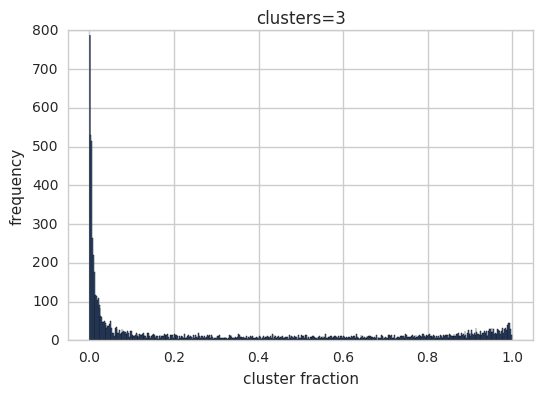

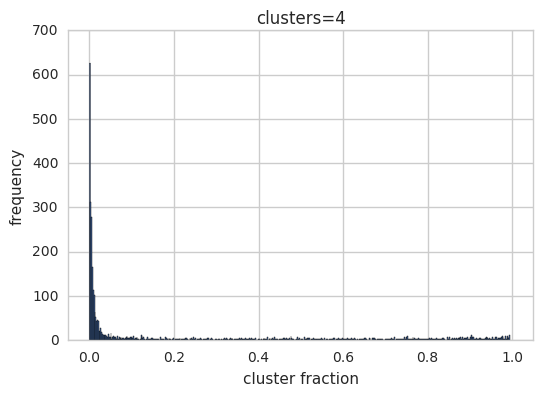

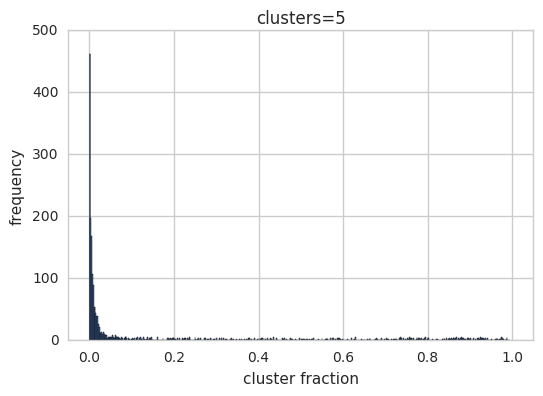

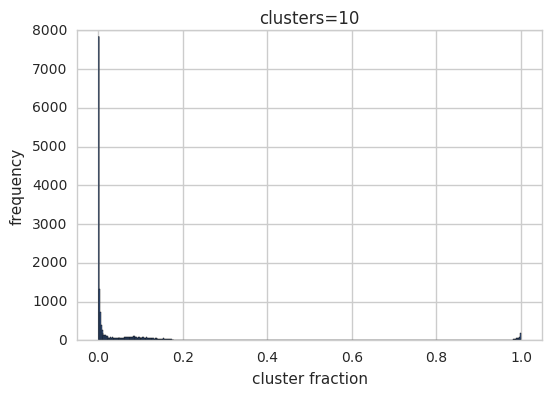

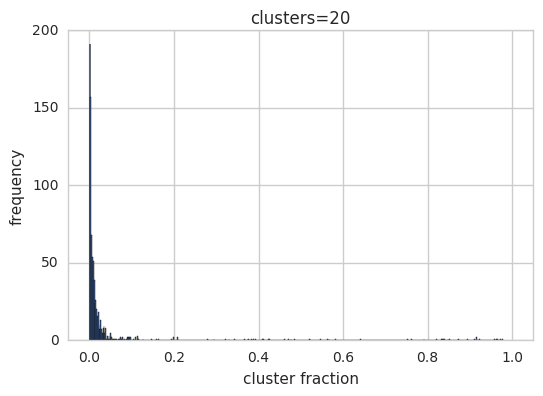

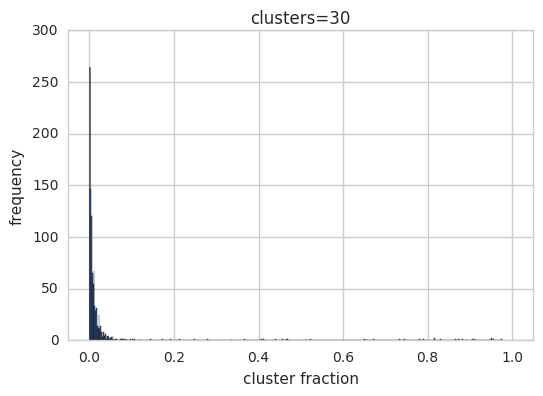

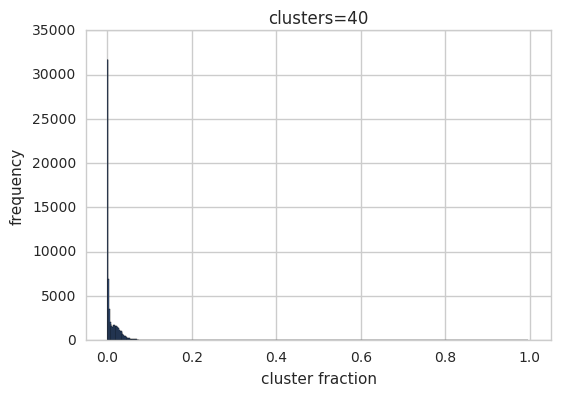

(array([  3.16730000e+04,   6.88100000e+03,   3.54200000e+03,
          2.10700000e+03,   1.87400000e+03,   1.65100000e+03,
          1.45400000e+03,   1.74800000e+03,   1.78300000e+03,
          1.58900000e+03,   1.62300000e+03,   1.59800000e+03,
          1.54300000e+03,   1.36600000e+03,   1.19700000e+03,
          1.05400000e+03,   1.02500000e+03,   8.98000000e+02,
          7.10000000e+02,   5.98000000e+02,   5.30000000e+02,
          4.77000000e+02,   4.19000000e+02,   3.06000000e+02,
          3.14000000e+02,   2.58000000e+02,   2.32000000e+02,
          2.06000000e+02,   1.78000000e+02,   1.65000000e+02,
          1.81000000e+02,   1.19000000e+02,   1.31000000e+02,
          1.36000000e+02,   1.15000000e+02,   8.90000000e+01,
          1.02000000e+02,   7.30000000e+01,   8.20000000e+01,
          7.10000000e+01,   6.60000000e+01,   7.10000000e+01,
          6.90000000e+01,   5.50000000e+01,   5.60000000e+01,
          5.50000000e+01,   5.20000000e+01,   5.20000000e+01,
        

In [1342]:
def plot_cluster_fractions(all_fractions, count):
    fractions_histogram_plot = plt.hist(np.array(all_fractions).flatten(), bins=500)
    plt.xlabel('cluster fraction')
    plt.ylabel('frequency')
    plt.title('clusters={}'.format(count))
    plt.xlim([-0.05, 1.05])
    plt.show()
    return fractions_histogram_plot

plot_cluster_fractions(all_fractions3, 3)
plot_cluster_fractions(all_fractions4, 4)
plot_cluster_fractions(all_fractions5, 5)
plot_cluster_fractions(all_fractions10, 10)
plot_cluster_fractions(all_fractions20, 20)
plot_cluster_fractions(all_fractions30, 30)
plot_cluster_fractions(all_fractions40, 40)


# fractions3_histogram_plot = plt.hist(np.array(all_fractions3).flatten(), bins=500)
# plt.show()
# fractions4_histogram_plot = plt.hist(np.array(all_fractions4).flatten(), bins=500)
# plt.show()
# fractions5_histogram_plot = plt.hist(np.array(all_fractions5).flatten(), bins=500)
# plt.show()
# fractions10_histogram_plot = plt.hist(np.array(all_fractions10).flatten(), bins=500)
# plt.show()
# fractions20_histogram_plot = plt.hist(np.array(all_fractions20).flatten(), bins=500)
# plt.show()
# fractions30_histogram_plot = plt.hist(np.array(all_fractions30).flatten(), bins=500)
# plt.show()
# fractions40_histogram_plot = plt.hist(np.array(all_fractions40).flatten(), bins=500)
# plt.show()

In [1278]:
dage_metrics = {}

In [ ]:
for algoritm in algoritms:
    for n in cluster_counts [2,10,40]:
        cluster_sizes ~ cluster_sizes_distribution
        random_labels = labels proportional to from cluster_sizes
        true_labels = half and half split between OK/NOK
        perform_clustering_evaluation
    

In [1291]:
clusters_count = 40
x = fractions40_histogram_plot[1][1:]
p_all = fractions40_histogram_plot[0]

x_index = np.arange(x.shape[0])
px = p_all/np.sum(p_all) 

dage_metrics[clusters_count] = []

for i in tqdm(range(10)):
# def random_simulation():
    indexes = rv_discrete(values=(x_index,px)).rvs(size=clusters_count)
    cluster_sizes = x[indexes]
    sum(cluster_sizes), cluster_sizes

    context_count = 4000

    actual_cluster_sizes = np.array(cluster_sizes*context_count, dtype=np.int)
    actual_cluster_sizes

    randomly_assigned_labels = []
    for cluster_index in range(clusters_count):
        randomly_assigned_labels += [cluster_index]*actual_cluster_sizes[cluster_index]

    np.random.shuffle(randomly_assigned_labels)

    true_labels = np.zeros(len(randomly_assigned_labels))

    true_labels[int(len(true_labels)/2):] = 1

    random_accuracies = []
    dage_iterations = 5
    for i in range(dage_iterations):
        run_metrics = mean_metrics(true_labels, randomly_assigned_labels)
        dage_metrics[clusters_count].append(run_metrics)
    

# all_accuracies = Parallel(n_jobs=25)(delayed(random_simulation)(unique_file) for i in tqdm(range(20)))


NameError: name 'fractions50_histogram_plot' is not defined

In [1294]:
np.array(dage_metrics[2])[:,0].shape

(50,)

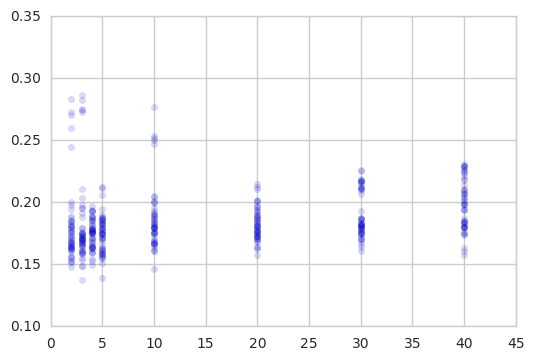

In [1295]:
plt.scatter([2]*50, np.array(dage_metrics[2])[:,0], alpha=0.15)
plt.scatter([3]*50, np.array(dage_metrics[3])[:,0], alpha=0.15)
plt.scatter([4]*50, np.array(dage_metrics[4])[:,0], alpha=0.15)
plt.scatter([5]*50, np.array(dage_metrics[5])[:,0], alpha=0.15)
plt.scatter([10]*50, np.array(dage_metrics[10])[:,0], alpha=0.15)
plt.scatter([20]*50, np.array(dage_metrics[20])[:,0], alpha=0.15)
plt.scatter([30]*50, np.array(dage_metrics[30])[:,0], alpha=0.15)
plt.scatter([40]*50, np.array(dage_metrics[40])[:,0], alpha=0.15)


In [1332]:
123

123

In [1296]:
np.save('hdbscan_random_metrics.npy', dage_metrics)

In [75]:
jitter_x = np.array([2]*200+[10]*200+[40]*200) + np.random.random(size=600)

array([  9.53719426e-01,   8.30347249e-01,   6.34754838e-01,
         5.25744323e-01,   9.04639316e-01,   3.82250941e-01,
         7.18333513e-01,   9.96101661e-01,   2.65365643e-02,
         9.69522820e-01,   5.55896978e-01,   5.61430337e-01,
         4.52537657e-01,   5.53228851e-01,   3.70587386e-01,
         6.66904977e-01,   3.45500641e-01,   9.64738965e-01,
         4.86874206e-01,   5.87023901e-01,   2.27597304e-01,
         1.50994354e-01,   3.74020608e-01,   8.37081713e-01,
         8.44574955e-01,   9.66192572e-01,   8.38173887e-01,
         9.99689270e-01,   8.17041182e-01,   3.73299011e-01,
         5.30637126e-01,   8.03806499e-01,   4.00138870e-01,
         6.29878609e-01,   5.25455795e-01,   3.09836976e-01,
         4.91967759e-01,   8.69400698e-01,   6.90329285e-01,
         4.75887266e-01,   4.47943389e-02,   8.46191392e-01,
         2.17421015e-01,   9.21366228e-01,   4.02292312e-01,
         3.46033762e-01,   1.11723671e-01,   2.96913897e-01,
         5.19025045e-01,

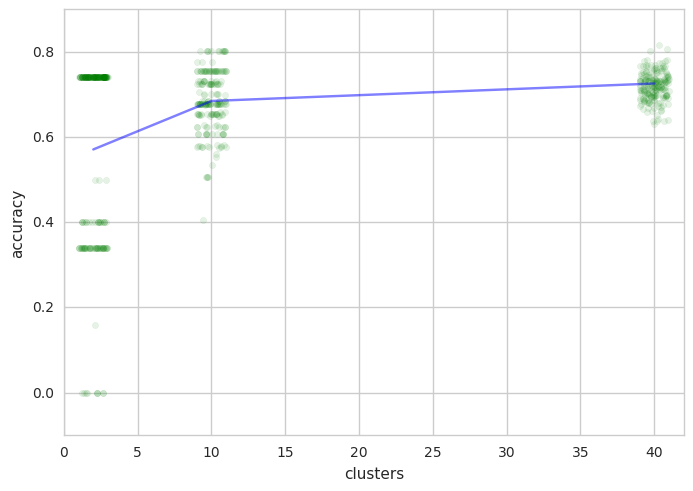

In [110]:
plt.plot(all_n, all_accuracies[4], alpha=alphas[i], color='blue')
jitter_x = np.array([2]*200+[10]*200+[40]*200) + np.random.random(size=600)*2 - 1
plt.scatter(jitter_x,accuracies, alpha=0.1, color='green')
plt.xlim([0,42])
plt.xlabel('clusters')
plt.ylabel('accuracy')

[0.34359200000000034, 0.3901860000000002, 0.42824650000000003]
[0.18952771272443406, 0.27912763466042156, 0.29365729898516785]
[0.20105564648117863, 0.33549509001636663, 0.39567921440261855]
[0.19873149999999995, 0.43636700000000006, 0.43162849999999992]
[0.57072033898305141, 0.68439971751412498, 0.72540960451977365]
[0.57072033898305141, 0.68439971751412498, 0.72540960451977365]


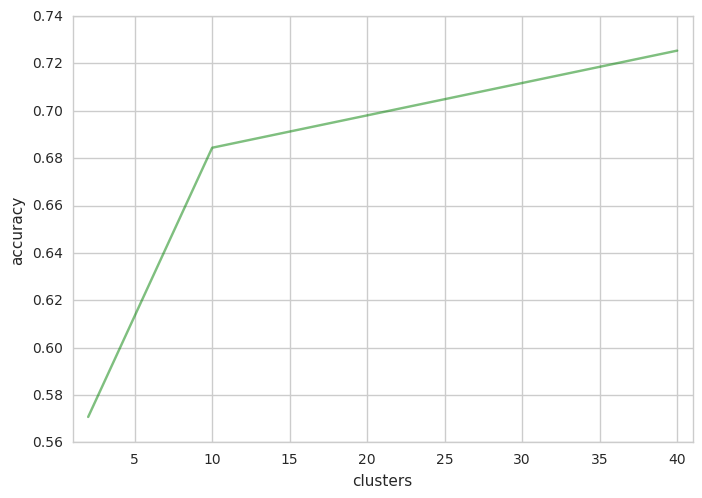

In [55]:
# colors = {0:'blue', 1:'green', 2:'red'}

colors = ['gray']*len(unique_files)
alphas = [0]*len(unique_files)
for i, unique_file in enumerate(unique_files):
    if 'tfidf' in unique_file:
        colors[i] = 'blue'
        alphas[i] = 0.5
    if 'mean-vec' in unique_file:
        colors[i] = 'green'
        alphas[i] = 0.5
    if 'wmd' in unique_file :
        colors[i] = 'blue'
        alphas[i] = 0.5
#     if 'wmd' in unique_file and 'banaan' in unique_file:
#         colors[i] = 'yellow'
#         alphas[i] = 0.15
        

for i, acc in enumerate(all_accuracies):
    print(acc)
    if acc[2] > 0.6:
        print(acc)
        plt.plot(all_n, acc, alpha=alphas[i], color=colors[i])
        break
# plt.title('agglomerative clustering\nblue: tfidf, green: mean-vec, red: wmd')
# plt.title('agglomerative clustering\nblue: tfidf, green: mean-vec, red: wmd')
plt.xlabel('clusters')
plt.ylabel('accuracy')
plt.xlim([1,41])
# plt.scatter([2]*50, np.array(dage_metrics[2])[:,0], alpha=0.15)
# plt.scatter([10]*50, np.array(dage_metrics[10])[:,0], alpha=0.15)
# plt.scatter([40]*50, np.array(dage_metrics[40])[:,0], alpha=0.15)


plt.show()
# na_frac = current_mean_metrics[3]


In [8]:
hdb = np.load('hdbscan_random_metrics.npy').item()
spe = np.load('spectral_random_metrics.npy').item()
agg = np.load('agglo_random_metrics.npy').item()

In [26]:
# arr = np.array(hdb[2])[:,0]
# print(arr)
def arr_perc(arr, n):
    return np.percentile(np.array(arr[n])[:,0], [10,90])

In [27]:
arr_perc(agg, 2)

array([ 0.15734358,  0.22      ])

In [1872]:
print('hdb',  arr_perc(hdb, 2), arr_perc(hdb, 10), arr_perc(hdb, 40))
print('spe', arr_perc(spe, 2), arr_perc(spe, 10), arr_perc(spe, 40))
print('agg', arr_perc(agg, 2), arr_perc(agg, 10), arr_perc(agg, 40))

hdb 0.204457054401 0.20900046123 0.226211738637
spe 0.188076274057 0.18215982814 0.195556546222
agg 0.22 0.189413818722 0.211931572304


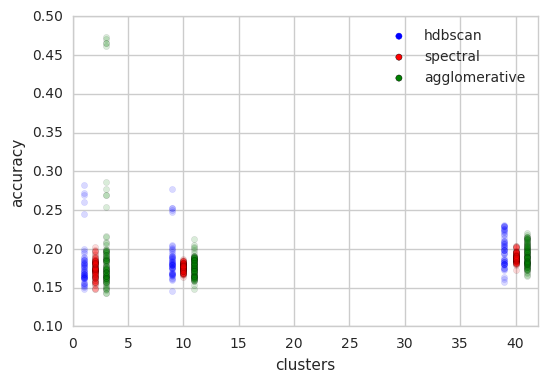

In [1378]:
delta = 1

def plot_random_clusterings(x):
    plt.scatter([x-delta]*50, np.array(hdb[x])[:,0], alpha=0.15, color='blue', label='')
    plt.scatter([x]*100, np.array(spe[x])[:,0], alpha=0.15, c='red', label='')
    plt.scatter([x+delta]*100, np.array(agg[x])[:,0], alpha=0.15, c='green', label='')

plot_random_clusterings(2)
plot_random_clusterings(10)
plot_random_clusterings(40)

# labelz
plt.scatter([-1], [0.15], alpha=1, color='blue', label='hdbscan')
plt.scatter([-1], [0.15], alpha=1, c='red', label='spectral')
plt.scatter([-1], [0.15], alpha=1, c='green', label='agglomerative')

plt.xlim([0, 42])
plt.xlabel('clusters')
plt.ylabel('accuracy')
plt.legend()

In [1659]:
files = glob('datasets/labels/spectral/*')
files_agglo = glob('datasets/labels/agglomerative/*')
files_hdbscan = glob('datasets/labels/hdbscan/*')

In [1439]:
files

['datasets/labels/spectral/cbow_pca_mean-vec_õun_banaan_w_2_s_False_n_40_n_2.npy',
 'datasets/labels/spectral/tfidf_mds_angular-distance_tfidf-features_joogitee_sõidutee_w_4_s_True_n_10_n_2.npy',
 'datasets/labels/spectral/sg_pca_sg_mean-vec_vectors_joogitee_sõidutee_w_2_s_False_n_10_n_10.npy',
 'datasets/labels/spectral/sg_mds_wmd_ämber_pang_w_3_s_True_n_10_n_2.npy',
 'datasets/labels/spectral/tfidf_mds_angular-distance_tfidf-features_õun_banaan_w_4_s_True_n_10_n_2.npy',
 'datasets/labels/spectral/cbow_mean-vec_euclidean-distance_joogitee_sõidutee_w_3_s_False_n_40.npy',
 'datasets/labels/spectral/cbow_pca_mean-vec_õun_kivi_w_3_s_True_n_2_n_2.npy',
 'datasets/labels/spectral/cbow_mds_angular-distance_mean-vec_countries_cities_w_3_s_True_n_20_n_40.npy',
 'datasets/labels/spectral/sg_mean-vec_angular-distance_õun_puder_w_3_s_True_n_10.npy',
 'datasets/labels/spectral/sg_mds_mean-vec_angular-distance_hea_halb_w_2_s_True_n_20_n_40.npy',
 'datasets/labels/spectral/sg_mds_mean-vec_euclidean-

In [1692]:
def set_d(f, d, val, options):
    for option in options:
        if option in f: 
            d[val] = option
            if val == 'dim_reduction':
                if 'hdbscan' in f:
                    d['n_dim_reduction'] = int(f.split('_')[-5])
                else:
                    d['n_dim_reduction'] = int(f.split('_')[-3]) 
            
    if val not in d:
        d[val] = None
        if val == 'model':
            d[val] = 'cbow'



NameError: name 'parse_int' is not defined

In [1690]:
def metrics_from_file(filename):
    labels = np.load(filename)
    true_labels = get_true_labels(labels)
    return mean_metrics(true_labels, labels)
    

def get_row_dict(f):
    d = {}
#     print(f)
    set_d(f, d, 'features', ['tfidf', 'mean-vec', 'wmd'])
    set_d(f, d, 'dataset', ['Eesti_TallinnTartu', 'countries_cities', 'hea_halb', 'joogitee_sõidutee', 'ämber_pang', 'õun_banaan', 'õun_kivi', 'õun_puder'])
    set_d(f, d, 'dim_reduction', ['pca', 'mds', 'lsi'])
    set_d(f, d, 'distance', ['euclidean', 'angular'])
    set_d(f, d, 'model', ['sg', 'cbow'])
    d['window_size'] = f[f.rindex('_w_')+3:][0]
    d['window_symmetric'] = True if f[f.rindex('_s_')+3:][0] == 'T' else False
#     d['n_clusters_true'] = int(f.split('_')[-1].split('.')[0])
    d['n_clusters_true'] = len(np.unique(np.load(f)))    
    d['accuracy'], d['recall'], d['precision'], d['na_fraction'] = metrics_from_file(f)
    
    set_d(f, d, 'clustering', ['spectral', 'hdbscan', 'agglomerative'])
    
    # set_d('n_clusters_category', [2, 10, 40])
    return d
# print(d)
# master_frame = master_frame.append(pd.Series(d), ignore_index=True)
# get_row_dict(files[0])

def get_row_list(f):
    d = get_row_dict(f)
    r = [np.nan]*len(cols)
    for k, v in d.items():
        r[cols.index(k)] = v
    return r


In [1693]:
print(files_hdbscan[0])
get_row_dict(files_hdbscan[0])

datasets/labels/hdbscan/sg_mds_mean-vec_angular-distance_õun_banaan_w_2_s_False_n_40_size_16_samples_8.npy


{'accuracy': 0.24701448040885826,
 'clustering': 'hdbscan',
 'dataset': 'õun_banaan',
 'dim_reduction': 'mds',
 'distance': 'angular',
 'features': 'mean-vec',
 'model': 'sg',
 'n_clusters_true': 3,
 'n_dim_reduction': 40,
 'na_fraction': 0.58536201022146483,
 'precision': 0.54282695046172702,
 'recall': 0.24876490630323708,
 'window_size': '2',
 'window_symmetric': False}

In [1564]:
cols=['model','features','distance','dim_reduction','n_dim_reduction', 'clustering','n_clusters_true','n_clusters_category','dataset','window_size','window_symmetric', 'accuracy', 'precision', 'recall', 'na_fraction']

In [1582]:
# all_rows = [get_row_list(f) for f in tqdm(files)]
# all_rows = [get_row_list(f) for f in tqdm(files,miniters=100)]
all_rows = Parallel(n_jobs=25)(delayed(get_row_list)(f) for f in tqdm(files,miniters=100))









  0%|          | 0/5037 [00:00<?, ?it/s]














  2%|▏         | 100/5037 [00:13<10:45,  7.65it/s]






  4%|▍         | 200/5037 [00:20<09:03,  8.89it/s]






  6%|▌         | 300/5037 [00:25<07:34, 10.41it/s]






  8%|▊         | 400/5037 [00:32<06:38, 11.64it/s]






 10%|▉         | 500/5037 [00:37<05:45, 13.14it/s]






 12%|█▏        | 600/5037 [00:43<05:12, 14.21it/s]






 14%|█▍        | 700/5037 [00:49<05:01, 14.41it/s]






 16%|█▌        | 800/5037 [00:55<04:43, 14.97it/s]






 18%|█▊        | 900/5037 [01:02<04:36, 14.98it/s]






 20%|█▉        | 1000/5037 [01:09<04:30, 14.93it/s]






 22%|██▏       | 1100/5037 [01:15<04:13, 15.55it/s]






 24%|██▍       | 1200/5037 [01:21<04:06, 15.55it/s]






 26%|██▌       | 1300/5037 [01:26<03:47, 16.39it/s]






 28%|██▊       | 1400/5037 [01:33<03:47, 15.96it/s]






 30%|██▉       | 1500/5037 [01:40<03:49, 15.43it/s]






 32%|███▏      | 1600/5037 [01:47<03:45, 15.24it/s]






 34%|███▍      | 17

In [ ]:
get_row_list

In [1660]:
all_rows_agglo = Parallel(n_jobs=25)(delayed(get_row_list)(f) for f in tqdm(files_agglo,miniters=100))

100%|██████████| 5460/5460 [05:49<00:00, 15.62it/s]


In [1694]:
all_rows_hdbscan = Parallel(n_jobs=25)(delayed(get_row_list)(f) for f in tqdm(files_hdbscan,miniters=100))

100%|██████████| 10920/10920 [41:07<00:00,  4.43it/s]


In [1700]:
# mf_h = pd.DataFrame(columns=cols, data=all_rows_hdbscan)
mf_h['n_clusters_category']=mf_h['n_clusters_true']

In [1713]:
mf_h.loc[(mf_h['n_clusters_category']>19)&(mf_h['n_clusters_category']<60), 'n_clusters_true'] = 40

In [1715]:
mf_h2 = mf_h[mf_h['n_clusters_true']<41]

In [145]:
from matplotlib.collections import PolyCollection


def patch_violin(ax):
    """Patch seaborn's violinplot in current axis to workaround matplotlib's bug ##5423."""
#     ax = sns.violinplot(data=mf[(mf["n_clusters_true"]==40)&(mf["model"]=='tfidf')]
#                     , x="distance", hue="dim_reduction", y="accuracy",  inner='box', facecolor='blue')
    
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            art.set_edgecolor((0.3, 0.3, 0.3))
            

def patch_facet(g):
    """Patch seaborn's violinplot in current axis to workaround matplotlib's bug ##5423."""
#     g = sns.FacetGrid(mf[mf["clustering"]=='spectral'], col="dataset", size=4, aspect=.7, col_wrap=4)
#     (g.map(sns.violinplot, "model", "accuracy", 'distance', inner='quartiles', linewidth=1))
    
    for ax in g.axes:
        for art in ax.get_children():
            if isinstance(art, PolyCollection):
                art.set_edgecolor((0.3, 0.3, 0.3))
            
# patch_violinplot()

In [1729]:
len(mf_h2)

7691

In [1668]:
mf_a['clustering'] = 'agglomerative'

In [1653]:
mf.to_pickle('spectral_master_df.p')

In [1672]:
mf_a.to_pickle('agglo_master_df.p')

In [1718]:
mf_h2.to_pickle('hdbscan_master_df_filtered_FINAL.p')

In [1741]:
mf.to_pickle('spec_agg_hdbs_master_df.p')


In [1720]:
mf_s = pd.DataFrame(mf)

In [1914]:
mf.loc[mf['features']=='tfidf', 'model'] = 'tfidf'
mf.to_pickle('spec_agg_hdbs_master_df2.p')


In [152]:
mf = pd.read_pickle('spec_agg_hdbs_master_df2.p')

In [114]:
mf

,model,features,distance,dim_reduction,n_dim_reduction,clustering,n_clusters_true,n_clusters_category,dataset,window_size,window_symmetric,accuracy,precision,recall,na_fraction
0,cbow,mean-vec,None,pca,40.0,spectral,2,NaN,õun_banaan,2,False,0.185492,0.504312,0.213999,0.632877
1,tfidf,tfidf,angular,mds,10.0,spectral,2,NaN,joogitee_sõidutee,4,True,0.163192,0.502287,0.151130,0.674901
2,sg,mean-vec,None,pca,10.0,spectral,10,NaN,joogitee_sõidutee,2,False,0.786471,0.954232,0.770502,0.114035
3,sg,wmd,None,mds,10.0,spectral,2,NaN,ämber_pang,3,True,0.186730,0.509910,0.210268,0.631696
4,tfidf,tfidf,angular,mds,10.0,spectral,2,NaN,õun_banaan,4,True,0.150815,0.504203,0.148677,0.700000
5,cbow,mean-vec,euclidean,None,NaN,spectral,40,NaN,joogitee_sõidutee,3,False,0.678605,0.867013,0.672561,0.195016
6,cbow,mean-vec,None,pca,2.0,spectral,2,NaN,õun_kivi,3,True,0.221745,0.538570,0.241819,0.590000
7,cbow,mean-vec,angular,mds,20.0,spectral,40,NaN,countries_cities,3,True,0.516571,0.814622,0.506727,0.331226
8,sg,mean-vec,angular,None,NaN,spectral,10,NaN,õun_puder,3,True,0.520856,0.764504,0.513195,0.309098
9,sg,mean-vec,angular,mds,20.0,spectral,40,NaN,hea_halb,2,True,0.332140,0.639476,0.330003,0.486086


In [1887]:
print('spe', np.mean([arr_perc(spe, 2), arr_perc(spe, 10), arr_perc(spe, 40)]))
print('agg', np.mean([arr_perc(agg, 2), arr_perc(agg, 10), arr_perc(agg, 40)]))
print('hdb',  np.mean([arr_perc(hdb, 2), arr_perc(hdb, 10), arr_perc(hdb, 40)]))

spe 0.188597549473
agg 0.207115130342
hdb 0.213223084756


(0, 1)

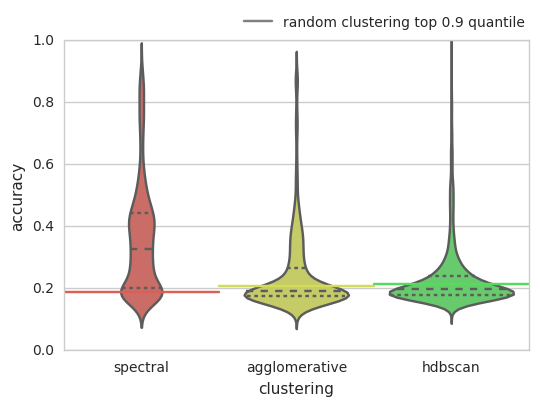

In [1908]:
# plt.plot([-1,0,1,2,3,4],[0.2,0.3, 0.3,0.3, 0.4,0.4])
plt.plot([-1,.5],[0.188,0.188])
plt.plot([.5,1.5],[0.207,0.207])
plt.plot([1.5,2.5],[0.213,0.213])
plt.plot([0,0],[0,0],label='random clustering top 0.9 quantile', c='gray')

ax = sns.violinplot(data=mf, inner='quartiles', x="clustering", y="accuracy")
plt.legend(loc=9, bbox_to_anchor=(0.69,1.122))
plt.ylim([0,1])

In [1759]:
# linreg over all parameters. all coefficients very small.
dv = DV(sparse=False)

X = np.nan_to_num(dv.fit_transform(mf_s.T.to_dict().values()))
X_fit = dv.fit(mf_s.T.to_dict().values())

len(mf_s)

model = LinearRegression()
model.fit(X, mf_s['accuracy'])
model.coef_, X_fit.feature_names_

In [1915]:
mf_agg_hdb = mf[(mf['clustering']=='agglomerative')|(mf['clustering']=='hdbscan')]

### Example of facetgrid

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

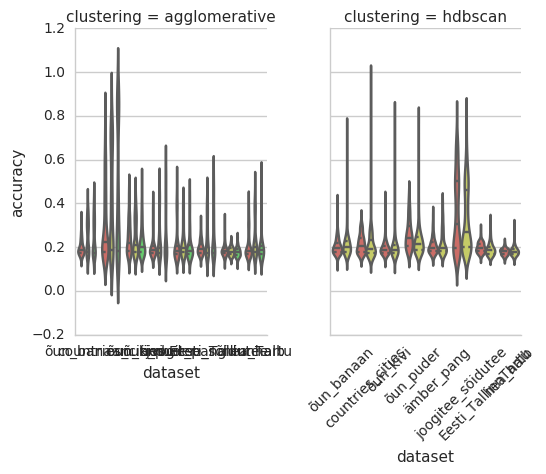

In [1909]:
g = sns.FacetGrid(mg_agg_hdb, col="clustering", size=4, aspect=.7)
(g.map(sns.violinplot, "dataset", "accuracy", 'model', inner='quartiles'))
plt.xticks(rotation=45)

In [ ]:
tee-tee, cc, õk display interesting results, look at them more closely

In [ ]:
ax = sns.violinplot(data=mf_agg_hdb[mf_agg_hdb['n_clusters_true']==40], x="dataset", hue="model", y="accuracy",  inner='quartiles')
plt.xticks(rotation=45)

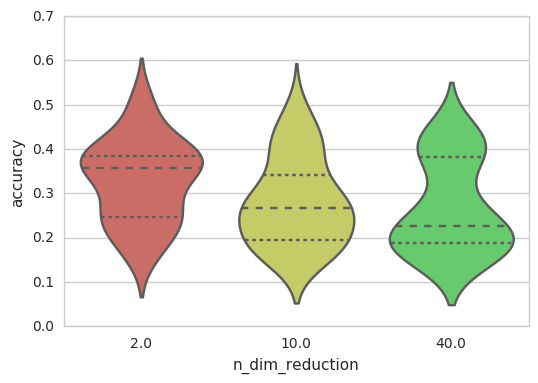

In [1941]:
ax = sns.violinplot(data=mf_agg_hdb[(mf_agg_hdb['dataset']=='countries_cities')&
                                    (mf_agg_hdb['features']=='tfidf')&
                                    (mf_agg_hdb['dim_reduction']=='lsi')&
                                    (mf_agg_hdb['n_clusters_true']>5)], 
                    x="n_dim_reduction", y="accuracy", inner='quartiles')


# Window size profiling.  

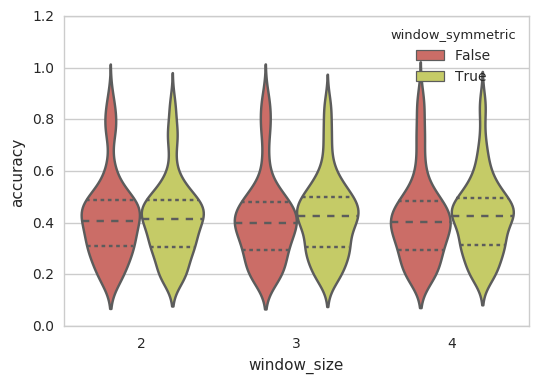

In [1948]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="window_size", hue="window_symmetric", y="accuracy",  inner='quartiles')


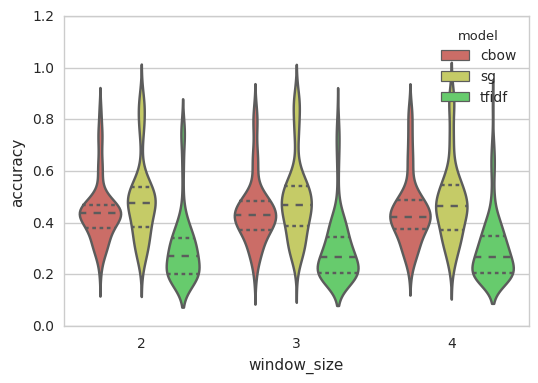

In [1949]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="window_size", hue="model", y="accuracy",  inner='quartiles')


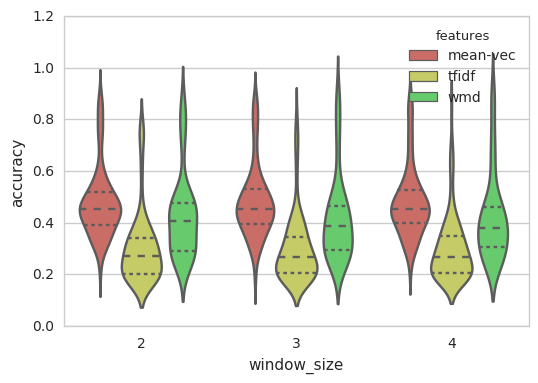

In [1951]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="window_size", hue="features", y="accuracy",  inner='quartiles')


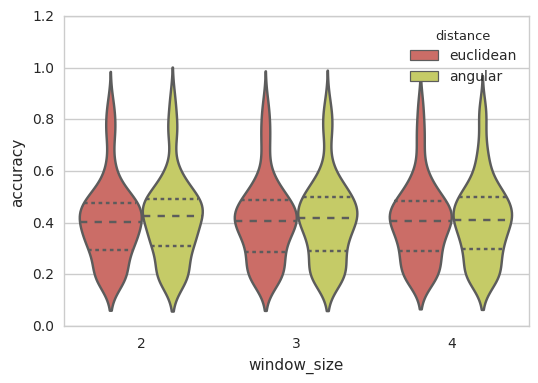

In [1952]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="window_size", hue="distance", y="accuracy",  inner='quartiles')


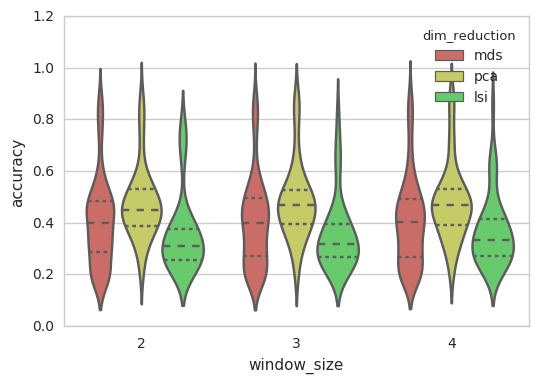

In [1953]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="window_size", hue="dim_reduction", y="accuracy",  inner='quartiles')


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

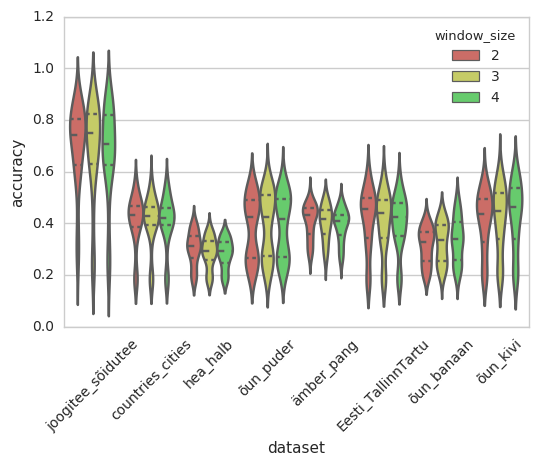

In [1955]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="dataset", hue="window_size", y="accuracy",  inner='quartiles')
plt.xticks(rotation=45)


In [1950]:
# ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
#                     , x="window_symmetric", hue="model", y="accuracy",  inner='quartiles')


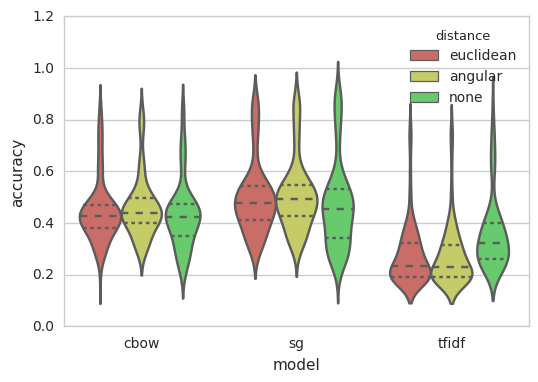

In [2014]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="model", hue="distance", y="accuracy",  inner='quartiles')


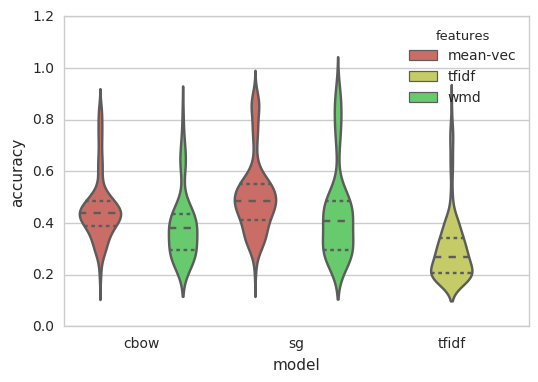

In [2018]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="model", hue="features", y="accuracy",  inner='quartiles')


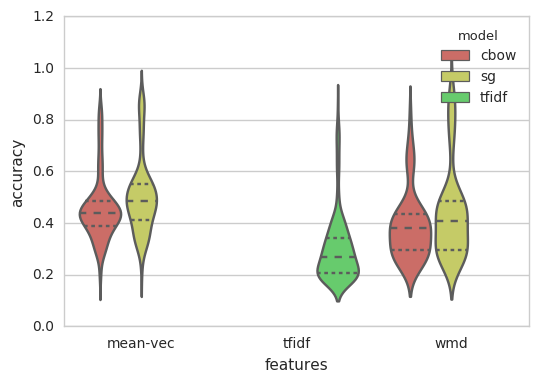

In [2019]:
ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
                    , x="features", hue="model", y="accuracy",  inner='quartiles')


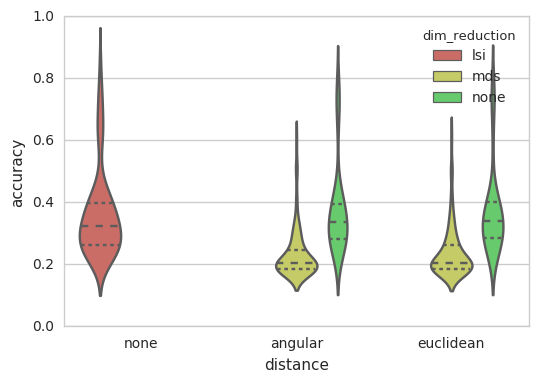

In [2010]:
ax = sns.violinplot(data=mf_s[(mf_s["n_clusters_true"]==40)&(mf_s["model"]=='tfidf')]
                    , x="distance", hue="dim_reduction", y="accuracy",  inner='quartiles')


(0, 1)

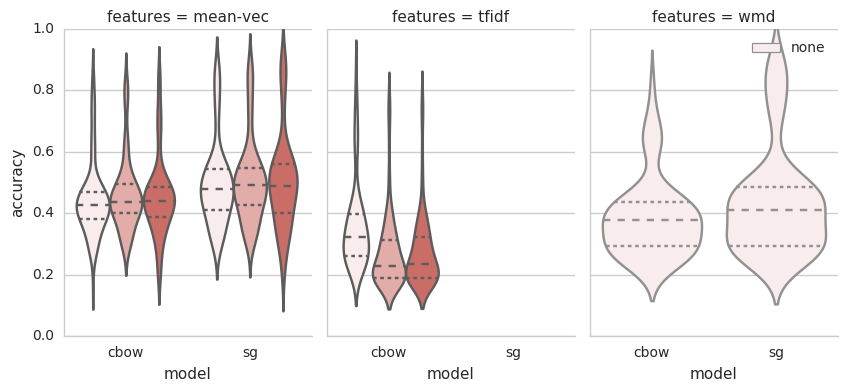

In [2017]:
g = sns.FacetGrid(mf_s[(mf_s["n_clusters_true"]==40)], col="features", size=4, aspect=.7, col_wrap=4)
(g.map(sns.violinplot, "model", "accuracy", 'distance', inner='quartiles'))
plt.legend()
plt.ylim([0,1])

# ax = sns.violinplot(data=mf_s[mf_s["n_clusters_true"]==40]
#                     , x="model", hue="distance", y="accuracy",  inner='quartiles')


(0, 1)

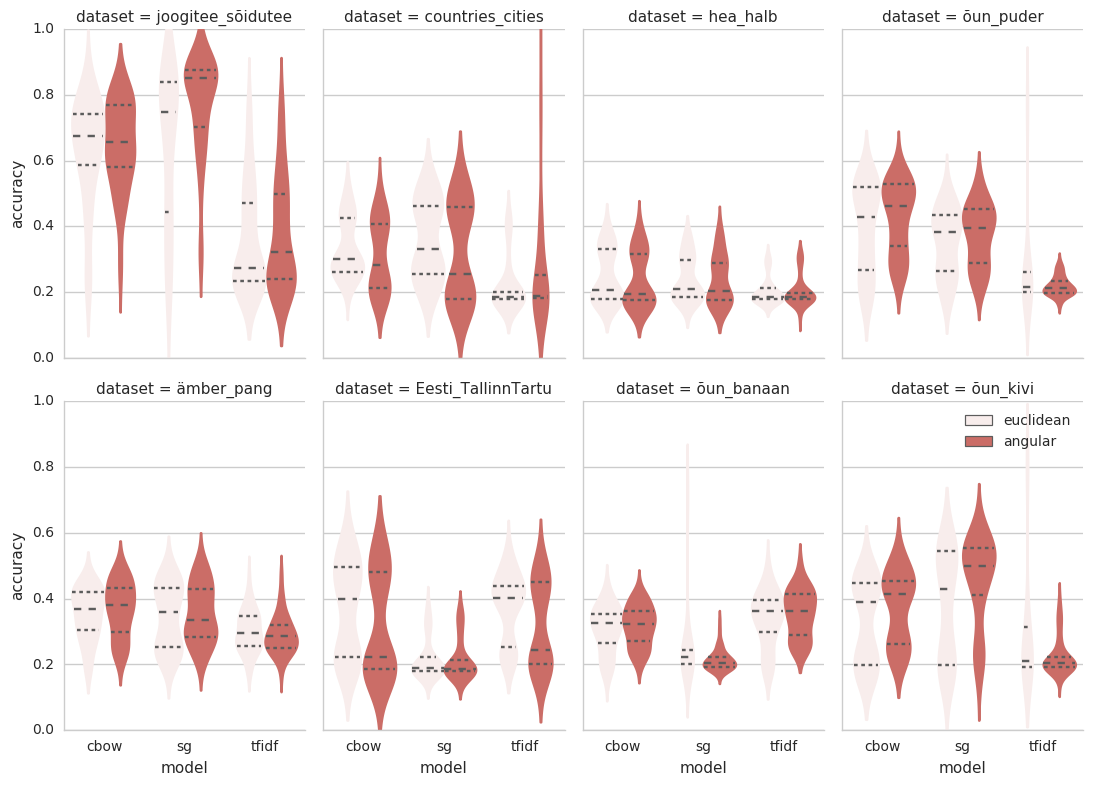

In [148]:
g = sns.FacetGrid(mf[mf["n_clusters_true"]==40], col="dataset", size=4, aspect=.7, col_wrap=4)
(g.map(sns.violinplot, "model", "accuracy", 'distance', inner='quartiles'))
plt.legend()
plt.ylim([0,1])

In [153]:
mf_s = pd.DataFrame(mf[mf["clustering"]=='spectral'])

In [156]:
mf_s

,model,features,distance,dim_reduction,n_dim_reduction,clustering,n_clusters_true,n_clusters_category,dataset,window_size,window_symmetric,accuracy,precision,recall,na_fraction
0,cbow,mean-vec,None,pca,40.0,spectral,2,NaN,õun_banaan,2,False,0.185492,0.504312,0.213999,0.632877
1,tfidf,tfidf,angular,mds,10.0,spectral,2,NaN,joogitee_sõidutee,4,True,0.163192,0.502287,0.151130,0.674901
2,sg,mean-vec,None,pca,10.0,spectral,10,NaN,joogitee_sõidutee,2,False,0.786471,0.954232,0.770502,0.114035
3,sg,wmd,None,mds,10.0,spectral,2,NaN,ämber_pang,3,True,0.186730,0.509910,0.210268,0.631696
4,tfidf,tfidf,angular,mds,10.0,spectral,2,NaN,õun_banaan,4,True,0.150815,0.504203,0.148677,0.700000
5,cbow,mean-vec,euclidean,None,NaN,spectral,40,NaN,joogitee_sõidutee,3,False,0.678605,0.867013,0.672561,0.195016
6,cbow,mean-vec,None,pca,2.0,spectral,2,NaN,õun_kivi,3,True,0.221745,0.538570,0.241819,0.590000
7,cbow,mean-vec,angular,mds,20.0,spectral,40,NaN,countries_cities,3,True,0.516571,0.814622,0.506727,0.331226
8,sg,mean-vec,angular,None,NaN,spectral,10,NaN,õun_puder,3,True,0.520856,0.764504,0.513195,0.309098
9,sg,mean-vec,angular,mds,20.0,spectral,40,NaN,hea_halb,2,True,0.332140,0.639476,0.330003,0.486086


(0, 1)

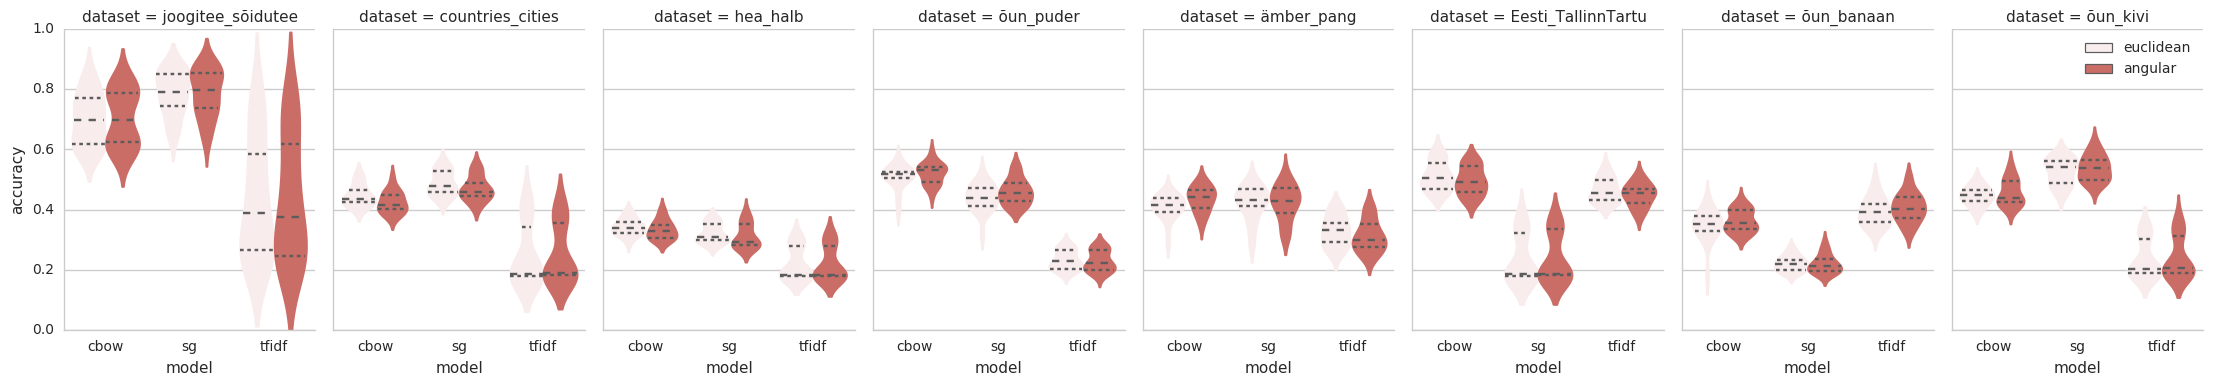

In [154]:
g = sns.FacetGrid(mf_s[mf_s["n_clusters_true"]==40], col="dataset", size=4, aspect=.7, col_wrap=8, sharex=True)
(g.map(sns.violinplot, "model", "accuracy", 'distance', inner='quartiles'))
plt.legend()
plt.ylim([0,1])

In [151]:
mf = 

(0, 1)

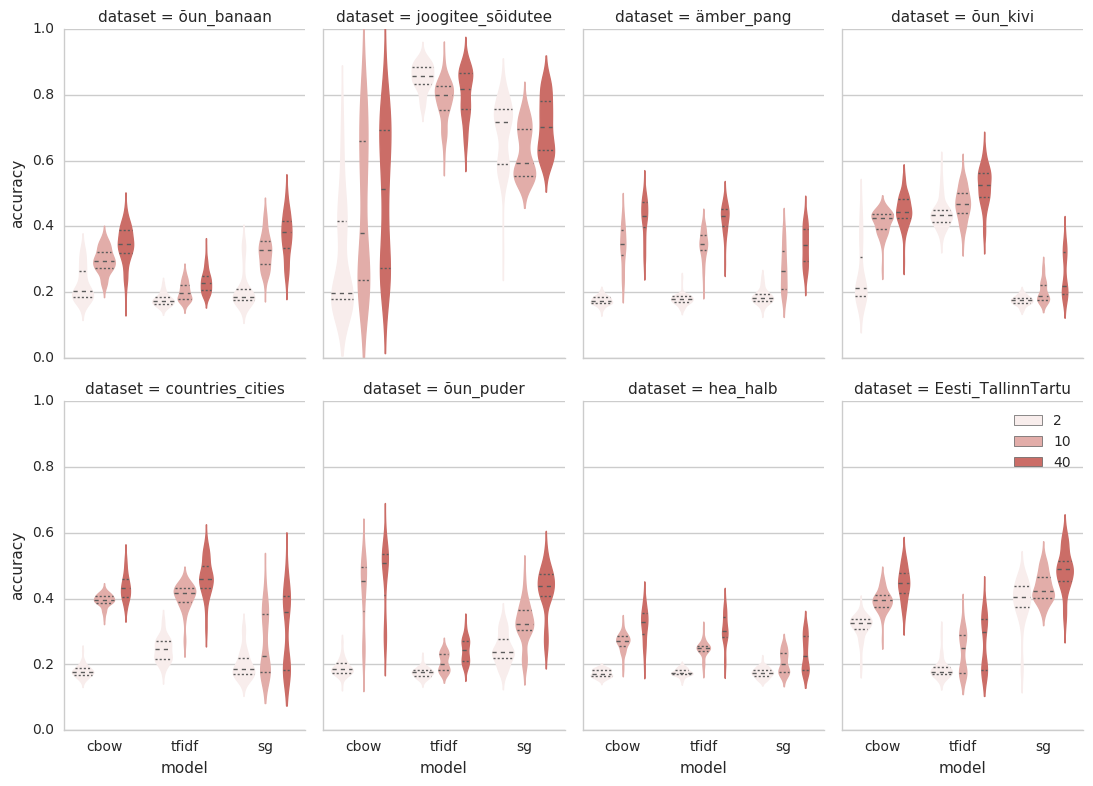

In [157]:
# SIIN CBOW SITT< AGA J@RGMISES ? kui wrap 8 siis ka
g = sns.FacetGrid(mf[mf["clustering"]=='spectral'], col="dataset", size=4, aspect=.7, col_wrap=4)
(g.map(sns.violinplot, "model", "accuracy", 'n_clusters_true', inner='quartiles', linewidth=1))
# patch_facet(g)
plt.legend()
plt.ylim([0,1])

/media/cdata-work/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 1)

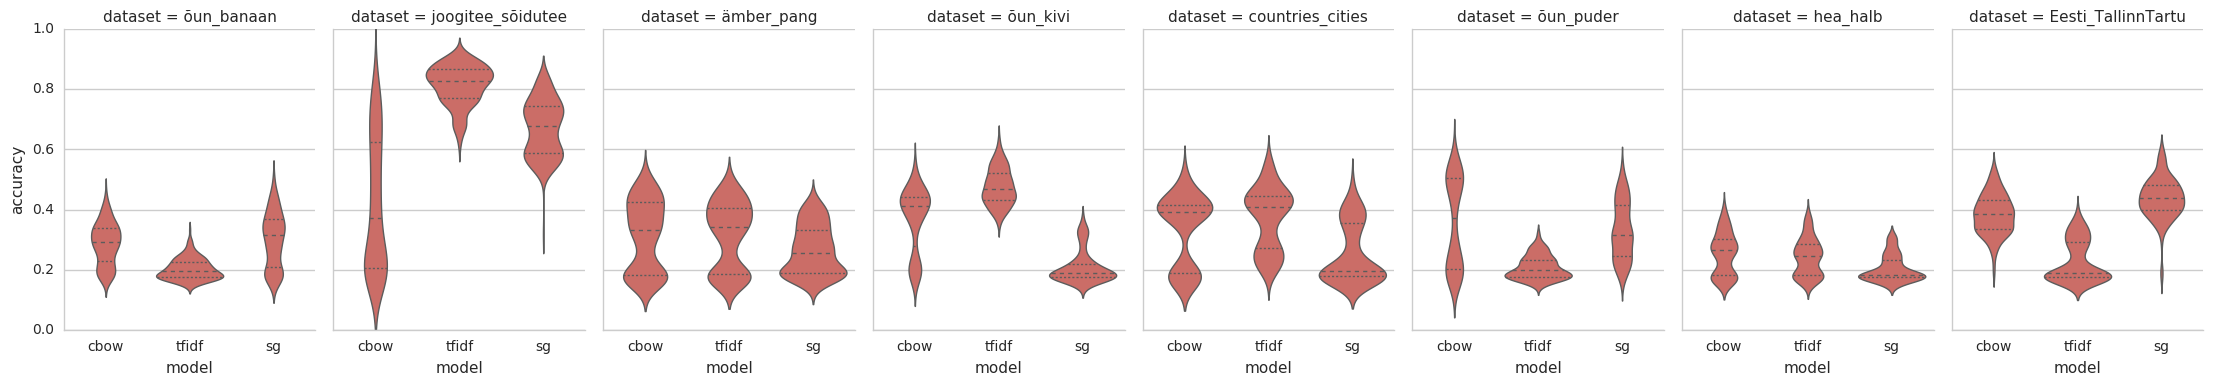

In [164]:
g = sns.FacetGrid(mf[mf["clustering"]=='spectral'], col="dataset", size=4, aspect=.7, col_wrap=8)
(g.map(sns.violinplot, "model", "accuracy", inner='quartiles', linewidth=1))
# patch_facet(g)
plt.legend()
plt.ylim([0,1])

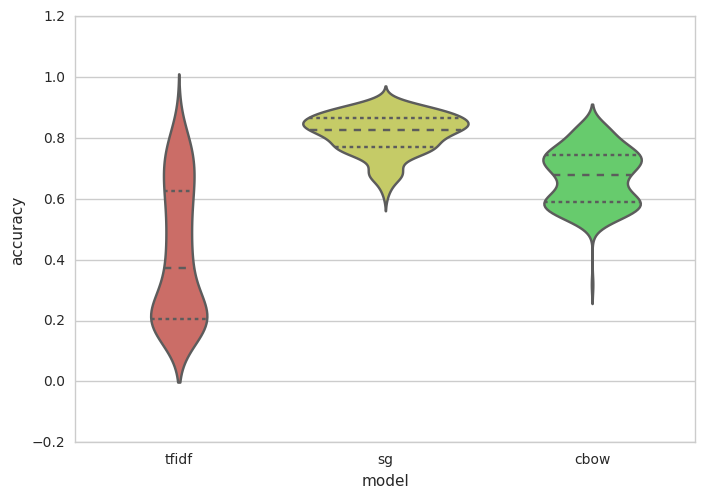

In [163]:
ax = sns.violinplot(data=mf[(mf["clustering"]=='spectral')&(mf["dataset"]=='joogitee_sõidutee')]
                    , x="model", y="accuracy",  inner='quartiles')


In [165]:
123

123